### Topic modeling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
clean_data= '/content/drive/MyDrive/Colab Notebooks/clean_dataset_hate'
with open(clean_data, "r") as file:
    lines = file.readlines()
    
clean_sample = [line.split() for line in lines]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from collections import Counter

In [ ]:
#from numpy.lib.function_base import vectorize
#utiliser la méthode de Tfidfvectorizer avec:
""" le cleaning étant déjà fait on tuilise directement les données"""
vectorizer = TfidfVectorizer()
print('Tweet before vectorization: {}'.format(clean_sample[30]))


Tweet before vectorization: ['dolunayleretour', 'sah', 'men', 'fou', 'vouloir', 'sale', 'match']


In [ ]:
X = vectorizer.fit_transform([' '.join(tweet) for tweet in clean_sample])
print('Tweet after vectorization: \n{}'.format(X[30]))
idf=vectorizer.idf_


Tweet after vectorization: 
  (0, 10589)	0.3213018520359845
  (0, 18510)	0.43260177326108346
  (0, 25598)	0.4115558027215249
  (0, 7808)	0.5856022786026766
  (0, 18109)	0.3261060352545905
  (0, 30220)	0.2623967852820503
  (0, 25678)	0.1487124710149907


In [ ]:
#dictionnaire contenant les mots et leurs indice tfidf
dd=dict(zip(vectorizer.get_feature_names(), idf))
# trier le dictionnaire
l=sorted(dd, key=(dd).get)
#print(l)
#imprimer les extrimités du dictionnaire
print(l[0],l[-1])
print(dd['sale'])
print(dd['racisme'])  # sale est plus commun dans les tweets que racisme.

sale 𝗙𝗜𝗘𝗥𝗧𝗘
2.4930633799202457
6.247691010567512


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Le mot le plus répandu dans notre dataset est le mot "sale", le moins utilisé est FIERTE arrivant en fin deu dictionnaire , je m'interroge sur le fait qu'il soit toujours en majuscule , en regardant la liste plus en détail , les mots qui arrivent en fin de dictionnaire sont des mots chinois ou arabes.

A- **LSA: Latent Semantic Analysis**

In [ ]:
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(X)


In [ ]:
print(lsa_top.shape)  # (no_of_doc*no_of_topics)


(13498, 10)


In [ ]:
Sujets = 10
def sujet_important(model):
  sorted_words={}
  for i, comp in enumerate(model.components_):
    vocab_comp = zip(vocab, comp)# tuple (mot, valeur num)
    #list_tuple=list(vocab_comp)
    #print(list_tuple[50])
    sorted_words[i] = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
  return sorted_words
    



In [ ]:
def print_important_word(sorted_words):
    for i in range(len(sorted_words)):
      print("Topic "+str(i)+": ")
      for t in sorted_words[i]:
          print(t[0],end=" ")
      print("\n")

In [ ]:
# les mots les plus importants dans chaque sujet 
vocab = vectorizer.get_feature_names()
#for mot in vocab :print(mot,'\n')
#print(lsa_model.components_)
#sujet_important(lsa_model)
print_important_word(sujet_important(lsa_model))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 0: 
pute fils sale aller faire noir fil lenglet cest chien 

Topic 1: 
noir sale faire aller français cest pd blanc arabe chat 

Topic 2: 
noir fils pute blanc chat cest cat snap français bleu 

Topic 3: 
pd français faire arabe cest aller bien étranger voir petit 

Topic 4: 
pd noir pute gros messi bande sale jsuis chat petit 

Topic 5: 
arabe aller faire voir vouloir savoir fils langue apprendre bien 

Topic 6: 
aller faire étranger fils bien enculer un_magrebin chien passer pouvoir 

Topic 7: 
cest faire fils noir_franck pouvoir an quil jai létranger sale 

Topic 8: 
cest aller fil lenglet noir_franck chien chat gros létranger macron 

Topic 9: 
fil faire pute cest lenglet noir_franck étranger bien grand pouvoir 



B- **LDA: Latent Dirichlet Allocation**

In [ ]:
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics
lda_top=lda_model.fit_transform(X)

In [ ]:
#matrice de même taille que le lsa
print(lda_top.shape)  # (no_of_doc,no_of_topics)

(13498, 10)


In [ ]:
# composition d'un tweet
print("Document 60: ")
for i,topic in enumerate(lda_top[60]):
  print("Topic ",i,": ",topic*100,"%")

Document 60: 
Topic  0 :  4.026549937730357 %
Topic  1 :  4.024716057323103 %
Topic  2 :  4.0209702981316635 %
Topic  3 :  8.743653519300638 %
Topic  4 :  59.038208073275044 %
Topic  5 :  4.034066122502513 %
Topic  6 :  4.029181422847494 %
Topic  7 :  4.029484256782672 %
Topic  8 :  4.023187862778457 %
Topic  9 :  4.029982449328051 %


Ici le tweet 60 appartiendrai au sujet numéro 4 (_+1) à 59%

In [ ]:
print_important_word(sujet_important(lda_model))

Topic 0: 
noir français bande sale fort arabe fils étranger donner cest 

Topic 1: 
sale écouter main sortie jeu salé jaime niqu dembele beurre 

Topic 2: 
noir_franck fr sorcière grâce sale rigoler so sûrement sen français 

Topic 3: 
noir pd sale wsh barca média envie mdrrr besoin meuf 

Topic 4: 
merd sale batard paris actufoot enculer gueul con film produit 

Topic 5: 
sale chien pd fou frère francai gueule ferme oublier couille 

Topic 6: 
pute fils sale lenglet fil gros aller merde pd mère 

Topic 7: 
français cest faire noir arabe fils étranger aller voir sale 

Topic 8: 
préférer place arabe js barcelone personn tirer le_sperme_noir national français 

Topic 9: 
noir sale faire aller fils français bien blanc arabe cest 



In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [ ]:
# Générer un wordcloud pour chaque topic
def word_cloud_sujet(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

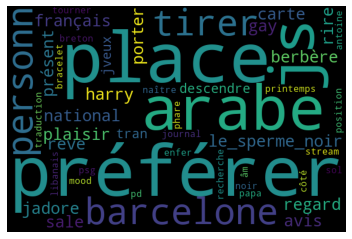

In [ ]:
word_cloud_sujet(8)

**Reduction de dimentionnalité et visualisation**

In [ ]:
%%time
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 13498 samples in 0.001s...
[t-SNE] Computed neighbors for 13498 samples in 5.073s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13498
[t-SNE] Computed conditional probabilities for sample 2000 / 13498
[t-SNE] Computed conditional probabilities for sample 3000 / 13498
[t-SNE] Computed conditional probabilities for sample 4000 / 13498
[t-SNE] Computed conditional probabilities for sample 5000 / 13498
[t-SNE] Computed conditional probabilities for sample 6000 / 13498
[t-SNE] Computed conditional probabilities for sample 7000 / 13498
[t-SNE] Computed conditional probabilities for sample 8000 / 13498
[t-SNE] Computed conditional probabilities for sample 9000 / 13498
[t-SNE] Computed conditional probabilities for sample 10000 / 13498
[t-SNE] Computed conditional probabilities for sample 11000 / 13498
[t-SNE] Computed conditional probabilities for sample 12000 / 13498
[t-SNE] Computed conditional probabilities for sa

In [ ]:
sujets=10
# calcule la moyenne des vecteurs
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    retourne la liste des vecteurs centraux de chaque sujet 
    '''
    moy_topic_vectors = []
    for t in range(sujets):
        tweet_sujet = []
        for i in range(len(keys)):
            if keys[i] == t:
                tweet_sujet.append(two_dim_vectors[i])    
        tweet_sujet = np.vstack(tweet_sujet)
        moy_tweet_sujet = np.mean(tweet_sujet, axis=0)
        moy_topic_vectors.append(moy_tweet_sujet)
    return moy_topic_vectors

In [ ]:
# fonction support
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

In [ ]:
lsa_keys = get_keys(lsa_top)

In [ ]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:sujets]


In [ ]:
# Our main plotting package (must have explicit import of submodules)
import bokeh.io

# Enable viewing Bokeh plots in the notebook
bokeh.io.output_notebook()
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
top_words_lsa =sujet_important(lsa_model)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(sujets), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(sujets):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1])
    plot.add_layout(label)

show(plot)

def print_important_word(sorted_words):
    for i in range(len(sorted_words)):
      print("Topic "+str(i)+": ")
      for t in sorted_words[i]:
          print(t[0],end=" ")
      print("\n")

In [ ]:
lda_keys = get_keys(lda_top)

In [ ]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_top)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 13498 samples in 0.025s...
[t-SNE] Computed neighbors for 13498 samples in 1.699s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13498
[t-SNE] Computed conditional probabilities for sample 2000 / 13498
[t-SNE] Computed conditional probabilities for sample 3000 / 13498
[t-SNE] Computed conditional probabilities for sample 4000 / 13498
[t-SNE] Computed conditional probabilities for sample 5000 / 13498
[t-SNE] Computed conditional probabilities for sample 6000 / 13498
[t-SNE] Computed conditional probabilities for sample 7000 / 13498
[t-SNE] Computed conditional probabilities for sample 8000 / 13498
[t-SNE] Computed conditional probabilities for sample 9000 / 13498
[t-SNE] Computed conditional probabilities for sample 10000 / 13498
[t-SNE] Computed conditional probabilities for sample 11000 / 13498
[t-SNE] Computed conditional probabilities for sample 12000 / 13498
[t-SNE] Computed conditional probabilities for sa

In [ ]:
top_words_lda = sujet_important(lda_model)

lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(sujets), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(sujets):
  for i in range(4):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1])
    plot.add_layout(label)

show(plot)

In [ ]:
X=sujet_important(lsa_model)
for i in range(len(X)):
  print([y[0] for x, y in enumerate(X[i])])

['pute', 'fils', 'sale', 'aller', 'faire', 'noir', 'fil', 'lenglet', 'cest', 'chien']
['noir', 'sale', 'faire', 'aller', 'français', 'cest', 'pd', 'blanc', 'arabe', 'chat']
['noir', 'fils', 'pute', 'blanc', 'chat', 'cest', 'cat', 'snap', 'français', 'bleu']
['pd', 'français', 'faire', 'arabe', 'cest', 'aller', 'bien', 'étranger', 'voir', 'petit']
['pd', 'noir', 'pute', 'gros', 'messi', 'bande', 'sale', 'jsuis', 'chat', 'petit']
['arabe', 'aller', 'faire', 'voir', 'vouloir', 'savoir', 'fils', 'langue', 'apprendre', 'bien']
['aller', 'faire', 'étranger', 'fils', 'bien', 'enculer', 'un_magrebin', 'chien', 'passer', 'pouvoir']
['cest', 'faire', 'fils', 'noir_franck', 'pouvoir', 'an', 'quil', 'jai', 'létranger', 'sale']
['cest', 'aller', 'fil', 'lenglet', 'noir_franck', 'chien', 'chat', 'gros', 'létranger', 'macron']
['fil', 'faire', 'pute', 'cest', 'lenglet', 'noir_franck', 'étranger', 'bien', 'grand', 'pouvoir']


In [ ]:
X=sujet_important(lda_model)
for i in range(len(X)):
  print([y[0] for x, y in enumerate(X[i])])

['noir', 'français', 'bande', 'sale', 'fort', 'arabe', 'fils', 'étranger', 'donner', 'cest']
['sale', 'écouter', 'main', 'sortie', 'jeu', 'salé', 'jaime', 'niqu', 'dembele', 'beurre']
['noir_franck', 'fr', 'sorcière', 'grâce', 'sale', 'rigoler', 'so', 'sûrement', 'sen', 'français']
['noir', 'pd', 'sale', 'wsh', 'barca', 'média', 'envie', 'mdrrr', 'besoin', 'meuf']
['merd', 'sale', 'batard', 'paris', 'actufoot', 'enculer', 'gueul', 'con', 'film', 'produit']
['sale', 'chien', 'pd', 'fou', 'frère', 'francai', 'gueule', 'ferme', 'oublier', 'couille']
['pute', 'fils', 'sale', 'lenglet', 'fil', 'gros', 'aller', 'merde', 'pd', 'mère']
['français', 'cest', 'faire', 'noir', 'arabe', 'fils', 'étranger', 'aller', 'voir', 'sale']
['préférer', 'place', 'arabe', 'js', 'barcelone', 'personn', 'tirer', 'le_sperme_noir', 'national', 'français']
['noir', 'sale', 'faire', 'aller', 'fils', 'français', 'bien', 'blanc', 'arabe', 'cest']
